In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("train.csv")
df.isna().sum()

id                  0
N_Days              0
Drug             6550
Age                 0
Sex                 0
Ascites          6547
Hepatomegaly     6552
Spiders          6559
Edema               0
Bilirubin           0
Cholesterol      8374
Albumin             0
Copper           6660
Alk_Phos         6556
SGOT             6559
Tryglicerides    8425
Platelets         584
Prothrombin        16
Stage               0
Status              0
dtype: int64

In [8]:
cleaned_null_df = df.dropna() 
cleaned_null_df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [9]:
# Calculate the z-score for each columns
z_ndays = np.abs(stats.zscore(cleaned_null_df['N_Days']))
# z_drug = np.abs(stats.zscore(cleaned_null_df['Drug']))
z_age = np.abs(stats.zscore(cleaned_null_df['Age']))
# z_sex = np.abs(stats.zscore(cleaned_null_df['Sex']))
# z_ascites = np.abs(stats.zscore(cleaned_null_df['Ascites']))
# z_hepatomegaly = np.abs(stats.zscore(cleaned_null_df['Hepatomegaly']))
# z_spiders = np.abs(stats.zscore(cleaned_null_df['Spiders']))
# z_edema = np.abs(stats.zscore(cleaned_null_df['Edema']))
z_bilirubin = np.abs(stats.zscore(cleaned_null_df['Bilirubin']))
z_cholesterol = np.abs(stats.zscore(cleaned_null_df['Cholesterol']))
z_albumin = np.abs(stats.zscore(cleaned_null_df['Albumin']))
z_copper = np.abs(stats.zscore(cleaned_null_df['Copper']))
z_alk_phos = np.abs(stats.zscore(cleaned_null_df['Alk_Phos']))
z_SGOT = np.abs(stats.zscore(cleaned_null_df['SGOT']))
z_tryglicerides = np.abs(stats.zscore(cleaned_null_df['Tryglicerides']))
z_platelets = np.abs(stats.zscore(cleaned_null_df['Platelets']))
z_prothrombin = np.abs(stats.zscore(cleaned_null_df['Prothrombin']))
z_stage = np.abs(stats.zscore(cleaned_null_df['Stage']))

# Define the threshold for outliers
threshold = 3

# Create a mask for rows where all z-scores are below the threshold
mask = (
    (z_ndays <= threshold) &
    (z_age <= threshold) &
    (z_bilirubin <= threshold) &
    (z_cholesterol <= threshold) &
    (z_albumin <= threshold) &
    (z_copper <= threshold) &
    (z_alk_phos <= threshold) &
    (z_SGOT <= threshold) &
    (z_tryglicerides <= threshold) &
    (z_platelets <= threshold) &
    (z_prothrombin <= threshold) &
    (z_stage <= threshold)
)

# Filter the dataset using the mask
filtered_df = cleaned_null_df[mask]

# Display the result
print(f"Original dataset size: {cleaned_null_df.shape}")
print(f"Filtered dataset size: {filtered_df.shape}")

Original dataset size: (6277, 20)
Filtered dataset size: (5521, 20)


In [10]:
print(filtered_df)

          id  N_Days             Drug      Age Sex Ascites Hepatomegaly  \
1          1  1786.0          Placebo  25329.0   F       N            Y   
4          4  1067.0          Placebo  11773.0   F       N            Y   
5          5  4523.0  D-penicillamine  15009.0   F       N            N   
7          7   708.0  D-penicillamine  14245.0   F       N            Y   
8          8   597.0          Placebo  17031.0   F       N            Y   
...      ...     ...              ...      ...  ..     ...          ...   
14979  14979  1212.0          Placebo  16122.0   F       N            Y   
14983  14983   790.0          Placebo  16736.0   F       N            N   
14987  14987  2835.0          Placebo  12279.0   M       N            Y   
14996  14996  1525.0  D-penicillamine  14025.0   F       N            N   
14999  14999  3458.0          Placebo  20600.0   F       N            N   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
1           N     N      

                 N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.076036  -0.279401    -0.101831  0.174270 -0.260207   
Age           -0.076036  1.000000   0.065494    -0.053455 -0.112965  0.080756   
Bilirubin     -0.279401  0.065494   1.000000     0.308498 -0.289092  0.443627   
Cholesterol   -0.101831 -0.053455   0.308498     1.000000 -0.059345  0.169915   
Albumin        0.174270 -0.112965  -0.289092    -0.059345  1.000000 -0.243157   
Copper        -0.260207  0.080756   0.443627     0.169915 -0.243157  1.000000   
Alk_Phos      -0.028364  0.042380   0.146493     0.123062 -0.065981  0.136626   
SGOT          -0.057310 -0.025485   0.137767     0.117358 -0.067972  0.113662   
Tryglicerides -0.137584 -0.001838   0.299536     0.247542 -0.098221  0.229689   
Platelets      0.125057 -0.096505  -0.077176     0.092830  0.141914 -0.112317   
Prothrombin   -0.172137  0.198895   0.331495    -0.009875 -0.267928  0.312229   
Stage         -0.228009  0.1

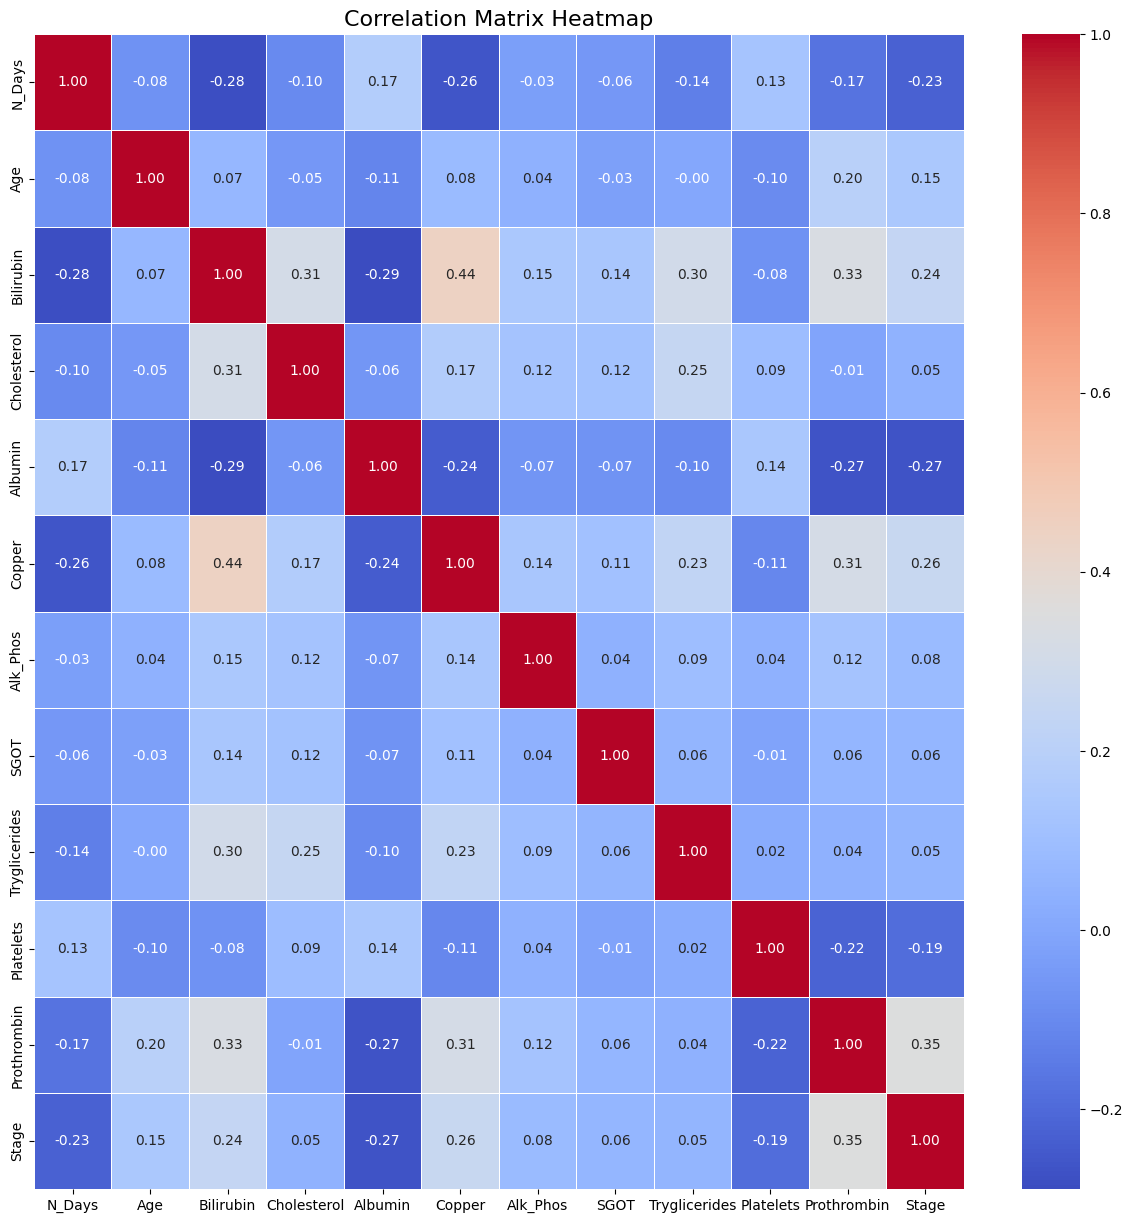

In [11]:
# Exclude unwanted columns like 'Status' and 'id'
columns_to_exclude = ['Status', 'id']
df_for_corr = cleaned_null_df.drop(columns=columns_to_exclude)

# Select only numeric columns
numeric_columns = df_for_corr.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

# Plot the heatmap with adjustments for better visibility
plt.figure(figsize=(15, 15))  # Make the figure larger for readability
sns.heatmap(
    correlation_matrix,
    annot=True,             # Display the correlation values
    cmap='coolwarm',        # Use a perceptually uniform colormap
    fmt='.2f',              # Format annotations to 2 decimal places
    linewidths=0.5,         # Add grid lines for clarity
    annot_kws={"size": 10}  # Set font size for annotations
)
plt.title('Correlation Matrix Heatmap', fontsize=16)  # Add a larger title
plt.show()


In [20]:
# Step 1: Encode categorical columns and prepare the dataset
columns_to_encode = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
encoder = LabelEncoder()
for column in columns_to_encode:
    cleaned_null_df.loc[:, column] = encoder.fit_transform(cleaned_null_df[column]).astype('int32')

# Encode the target variable (Status)
cleaned_null_df.loc[:, 'Status'] = encoder.fit_transform(cleaned_null_df['Status'])

# Exclude irrelevant columns
columns_to_exclude = ['id']  # Exclude ID columns or other non-relevant features
df_for_knn = cleaned_null_df.drop(columns=columns_to_exclude)

# Step 2: Split data into features (X) and target (y)
X = df_for_knn.drop(columns=['Status'])  # Features
y = df_for_knn['Status']  # Target variable

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Use 3 neighbors as an example
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7834394904458599

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       844
           1       0.40      0.07      0.11        30
           2       0.72      0.57      0.64       382

    accuracy                           0.78      1256
   macro avg       0.64      0.51      0.53      1256
weighted avg       0.77      0.78      0.77      1256

